# Examen 1 solución: David García Gómez. 1000439477

## Punto A):

Definimos dos dataframes iguales, uno para guardarlo como el original y otro como la copia que debemos manipular

In [53]:
import pandas as pd
import numpy as np
import pylab as plt

A=[1,2,3,4,5,6]
B=np.array([464.,469.,532.,552.,576.,589.])
d={"día":A, "IPMH":B}
df1=pd.DataFrame.from_dict(d)
df2=pd.DataFrame.from_dict(d)
df1

,día,IPMH
0,1,464.0
1,2,469.0
2,3,532.0
3,4,552.0
4,5,576.0
5,6,589.0


Editamos nuestro dataframe manipulable "df2" para que el IPMH tenga una incertidumbre del 2 por mil en cada dato. Esto se hace usando la función np.random.uniform, que nos permite crear un número aleatorio entre un intervalo (a,b), en nuestro caso, para cada dato, el número aleatorio a elegir será uno entre el intervalo $+-\frac{2}{1000}df2[i]$ con i variando entre 1 y 6

In [19]:
np.random.seed(2)
for i in range(0,6):
    k=df2.IPMH[i]*0.002  #Hallar el 2% del valor
    df2.IPMH[i]+=np.random.uniform(-k,k)
df2

C:\Users\DAVIDG~1\AppData\Local\Temp/ipykernel_10352/2179858376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.IPMH[i]+=np.random.uniform(-k,k)


,día,IPMH
0,1,463.881207
1,2,468.110638
2,3,532.105682
3,4,551.857192
4,5,575.816527
5,6,588.600269


Así creamos nuestro nuevo dataframe "df2" con una incertidumbre del 2 por mil en la columna IPMH


Veamos los puntos en una gráfica:

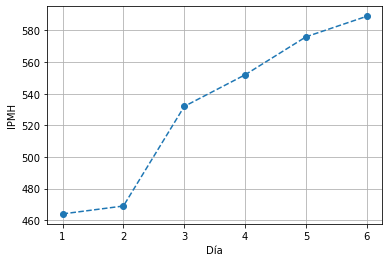

In [54]:
import pylab as plt
plt.plot(df2.día,df2.IPMH,"o--")
plt.xlabel("Día")
plt.ylabel("IPMH")
plt.grid()
plt.show()

Ahora hagamos un fit de los puntos con un polinomio de grado dos con la función np.polyfit

In [55]:
g=np.polyfit(df2.día,df2.IPMH,2)
f1=lambda x: g[0]*(x**2)+g[1]*x+g[2] #función que ajusta nuestros puntos del df
#f1(0.5)

Ahora comparemos el ajuste con nuestros puntos para ver si sí funciona bien

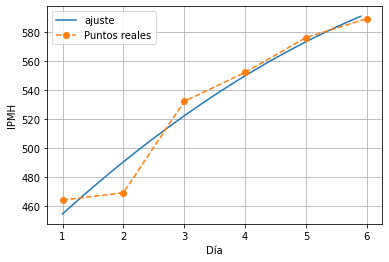

In [57]:
x1=np.arange(1,6,0.1)
y1=f1(x1)
plt.plot(x1,y1,label="ajuste")
plt.plot(df2.día,df2.IPMH,"o--",label="Puntos reales")
plt.legend()
plt.grid()
plt.xlabel("Día")
plt.ylabel("IPMH")
plt.show()

Como nuestra función es un polinomio de grado 2, podemos hallar analíticamente su derivada (Velocidad) y su segunda derivada (Aceleración). 

Vamos a definirlas:

In [39]:
f11=lambda x: 2*x*g[0]+g[1] #Primera derivada aceleración
f12=2*g[0]           # Segunda derivada

Teniendo la derivada del fit, podemos hallar la velocidad inicial, evaluando x=1 en la derivada, ya que 1 es el día de inicio de nuestro dataframe.

In [47]:
print("La velocidad es",f11(1), "IPMH/Día")
print("La aceleración es", f12, "IPMH/Dia**2")

La velocidad es 37.9571428571431 IPMH/Día
La aceleración es -4.142857142857236 IPMH/Dia**2


Para hallar el máximo debemos encontrar un valor para el que la velocidad sea 0, o sea resolver la ecuación f'(x)=0 y ese x será el valor del día donde el valor del IPMH es máximo

Usemos el método de newton de scipy

In [62]:
import scipy as sp
from scipy import optimize
m=sp.optimize.newton(f11,1)
print("el día en el que el IPMH alcanza el valor máximo es el día:", m)

el día en el que el IPMH alcanza el valor máximo es el día: 10.162068965517095


Esto nos dice que en el 10mo día más o menos, el IPMH debe tener valor máximo porque la segunda derivada es negativa, o sea que es cóncava hacia abajo. 

Ahora veámoslo en una gráfica:

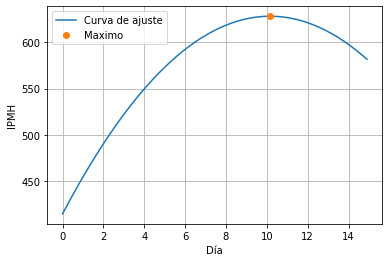

In [60]:
x2=np.arange(0,15,0.1)
y2=f1(x2)
plt.plot(x2,y2,label="Curva de ajuste")    #Gráfica de la función fit de nuestro dataframe
plt.plot(10.162068965517095,f1(10.162068965517095),"o",label="Maximo") #Máximo
plt.xlabel("Día")
plt.ylabel("IPMH")
plt.grid()
plt.legend()
plt.show()